In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/database.csv


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['database.csv']


In [24]:
data = pd.read_csv("../input/database.csv")
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [25]:
import pandas as pd
database = pd.read_csv("../input/database.csv")

In [26]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [27]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [28]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')

In [45]:
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
data['Timestamp']

0       -1.57631e+08
1       -1.57466e+08
2       -1.57356e+08
3       -1.57094e+08
4       -1.57026e+08
            ...     
23407    1.48291e+09
23408    1.48292e+09
23409    1.48293e+09
23410    1.48305e+09
23411    1.48313e+09
Name: Timestamp, Length: 23412, dtype: object

In [30]:
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-1.57631e+08
1,1.863,127.352,80.0,5.8,-1.57466e+08
2,-20.579,-173.972,20.0,6.2,-1.57356e+08
3,-59.076,-23.557,15.0,5.8,-1.57094e+08
4,11.938,126.427,15.0,5.8,-1.57026e+08


In [31]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

In [32]:
x

[36206830.185080744,
 34175967.001145326,
 670282.7021880572,
 17395659.717718378,
 34073111.742432006,
 38543368.07842475,
 29785437.390014697,
 38496999.81584804,
 17008034.38596198,
 39861916.8976925,
 32133984.329781447,
 34020294.17714678,
 37995622.127698414,
 237512.25147207853,
 28160213.107469793,
 35553560.298658244,
 39887269.32902941,
 39480296.08914748,
 39141374.11232777,
 39557131.74727819,
 39790863.37302458,
 39360205.624920025,
 39258239.92520097,
 39205978.33428717,
 39403905.2105139,
 39359538.45567432,
 39986232.76714278,
 39137704.68147638,
 39440377.12927928,
 39039519.607483,
 39015390.31976323,
 39479184.14040463,
 15019981.228626166,
 39385891.64087979,
 39456500.38605055,
 39398679.05142252,
 39345194.316891596,
 39425921.79562227,
 39647421.98519735,
 2000618.178129986,
 39530333.782575585,
 39242672.64280111,
 39497864.87928445,
 39375884.10219416,
 2017186.2143984004,
 39637525.641386025,
 39295490.20808634,
 39519881.46439282,
 39929189.79663473,
 3840960

In [33]:
y

[13840410.176962223,
 11881301.402387464,
 9353689.030783832,
 4201561.945848856,
 13007756.436293418,
 10174774.696352119,
 14792871.388104273,
 10185637.777167788,
 4623276.298148082,
 8887667.686499516,
 10916076.340810224,
 11384061.642321495,
 18442147.467542604,
 9571086.146556314,
 16051610.132681027,
 5328467.55153712,
 17932682.574196413,
 17989984.43171819,
 18122314.779977135,
 17988060.119996894,
 17901193.407836296,
 18003463.218931444,
 18010134.129081875,
 18134744.72774404,
 18018440.872588485,
 18035814.57659,
 17961004.219147965,
 18159043.129624058,
 18009689.28673635,
 18189411.105178673,
 18191669.266259912,
 17974746.368688498,
 13155365.66248413,
 18015621.87032391,
 18008206.597622164,
 18108851.1831748,
 18035517.37899933,
 18004648.888473775,
 17967503.9348691,
 18194379.62953185,
 18070935.715111427,
 18054850.552704368,
 18005538.217231452,
 18052022.98914003,
 18221970.388599694,
 17961594.958121076,
 17933713.9731059,
 18048154.772371113,
 17939019.6954696

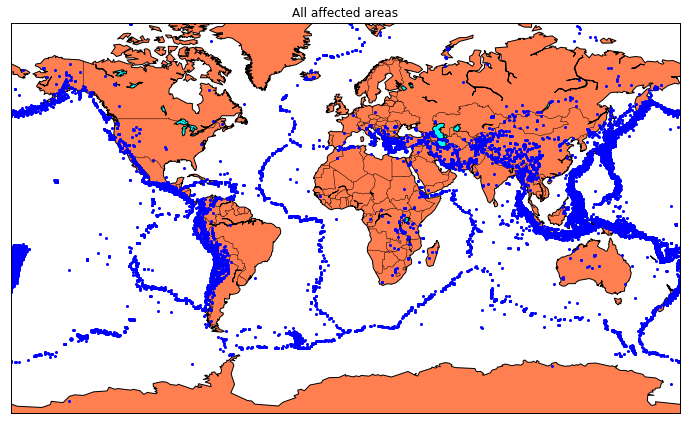

In [34]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [35]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

In [36]:
X

,Timestamp,Latitude,Longitude
0,-1.57631e+08,19.2460,145.6160
1,-1.57466e+08,1.8630,127.3520
2,-1.57356e+08,-20.5790,-173.9720
3,-1.57094e+08,-59.0760,-23.5570
4,-1.57026e+08,11.9380,126.4270
...,...,...,...
23407,1.48291e+09,38.3917,-118.8941
23408,1.48292e+09,38.3777,-118.8957
23409,1.48293e+09,36.9179,140.4262
23410,1.48305e+09,-9.0283,118.6639


In [37]:
y

,Magnitude,Depth
0,6.0,131.60
1,5.8,80.00
2,6.2,20.00
3,5.8,15.00
4,5.8,15.00
...,...,...
23407,5.6,12.30
23408,5.5,8.80
23409,5.9,10.00
23410,6.3,79.00


In [39]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18727, 3) (4682, 3) (18727, 2) (4682, 3)


In [40]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[  5.96,  50.97],
       [  5.88,  37.8 ],
       [  5.97,  37.6 ],
       ...,
       [  6.42,  19.9 ],
       [  5.73, 591.55],
       [  5.68,  33.61]])

In [41]:
reg.score(X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8615078576055115

In [42]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with '

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

array([[  5.8888 ,  43.532  ],
       [  5.8232 ,  31.71656],
       [  6.0034 ,  39.3312 ],
       ...,
       [  6.3066 ,  23.9292 ],
       [  5.9138 , 592.151  ],
       [  5.7866 ,  38.9384 ]])

In [43]:
best_fit.score(X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8748782808765546

In [44]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

NameError: name 'model' is not defined

In [46]:
print(reg.predict([[-1.57631e+08,17.123,73.45]]))

NameError: name 'regr' is not defined